In [1]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = '/content/Social_Media_Advertising.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Social_Media_Advertising.csv'
data = pd.read_csv(file_path)

# Columns to encode
categorical_columns = ['Target_Audience', 'Campaign_Goal', 'Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Company']

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Convert 'Duration' column to numeric (extract the number of days)
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)

# Convert 'Acquisition_Cost' to numeric by removing dollar sign and commas
data['Acquisition_Cost'] = data['Acquisition_Cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Drop the 'Campaign_ID' and 'Date' columns as they are not needed for correlation analysis
data_cleaned = data.drop(columns=['Campaign_ID', 'Date'])

# Compute the correlation matrix
correlation_matrix = data_cleaned.corr()

# Display correlation with 'ROI' and sort it
roi_correlation = correlation_matrix['ROI'].sort_values(ascending=False)
print(roi_correlation)

ROI                 1.000000
Engagement_Score    0.354717
Clicks              0.188343
Impressions         0.166009
Language            0.004138
Location            0.002576
Customer_Segment    0.002051
Campaign_Goal       0.001956
Conversion_Rate    -0.000249
Company            -0.000336
Duration           -0.001457
Acquisition_Cost   -0.001659
Target_Audience    -0.002019
Channel_Used       -0.148481
Name: ROI, dtype: float64


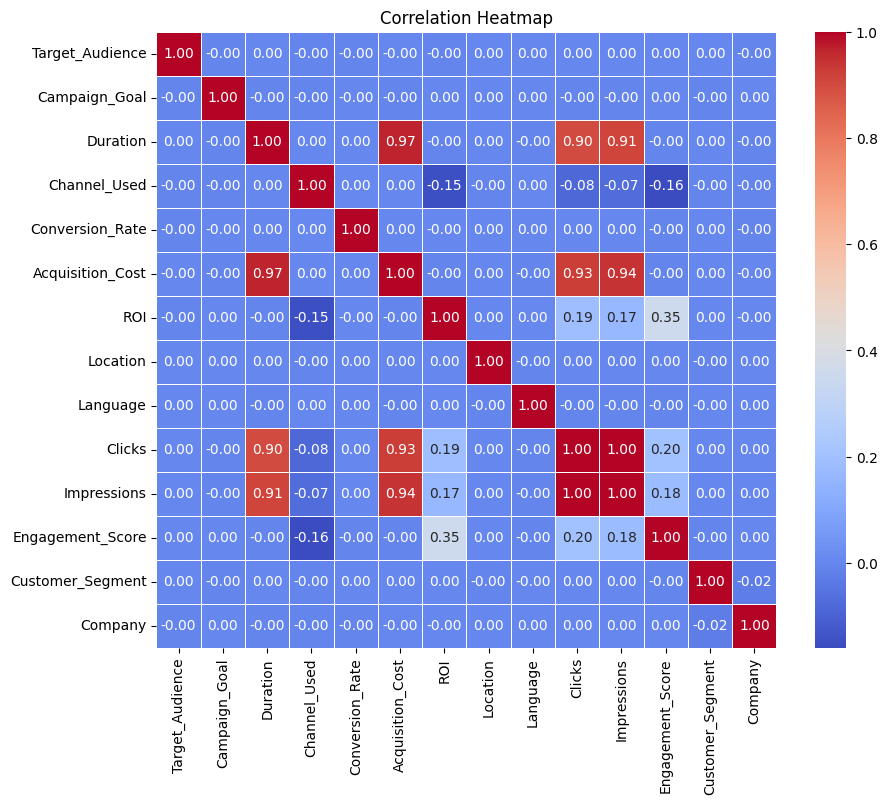

In [3]:
# Display the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.484e+05, tolerance: 1.455e+02
  model = cd_fast.enet_coordinate_descent(


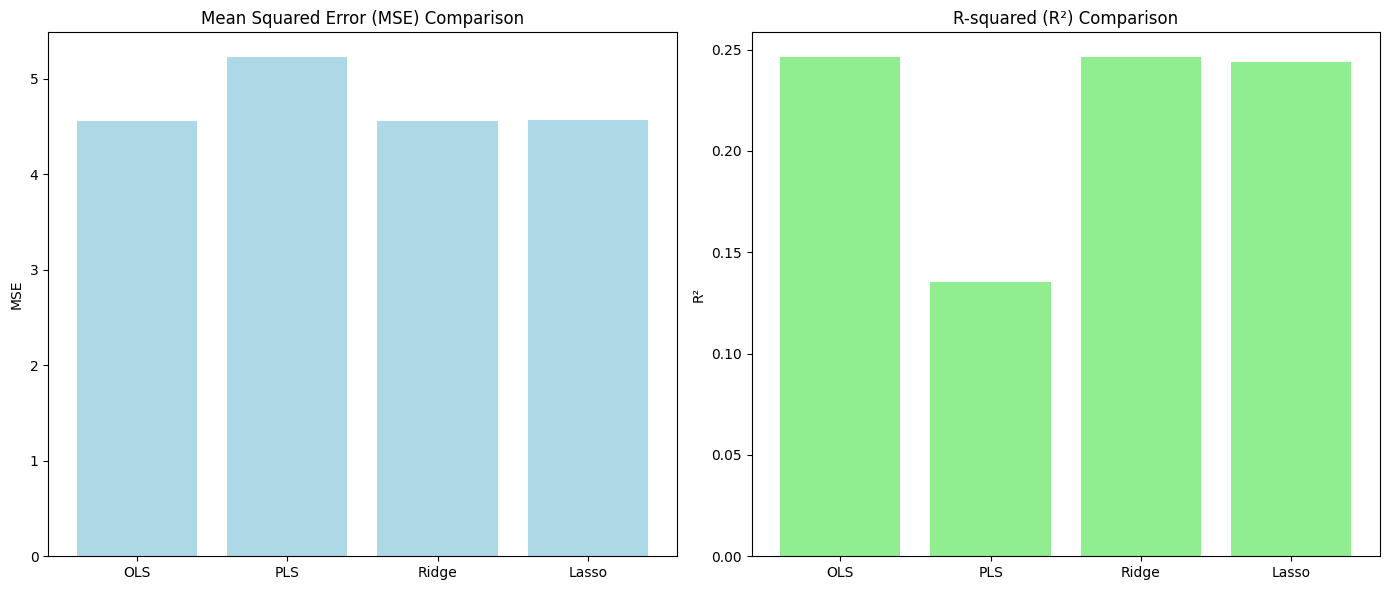

In [4]:
features = ['Engagement_Score', 'Clicks', 'Impressions']

# Define independent and dependent variables
X = data_cleaned[features]
y = data_cleaned['ROI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OLS (Ordinary Least Squares) Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)

# PLS (Partial Least Squares) Regression
pls_model = PLSRegression(n_components=2)
pls_model.fit(X_train, y_train)
y_pred_pls = pls_model.predict(X_test)

# Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Performance metrics (MSE and R^2)
y_preds = [y_pred_ols, y_pred_pls, y_pred_ridge, y_pred_lasso]
models = ['OLS', 'PLS', 'Ridge', 'Lasso']

mse_scores = [mean_squared_error(y_test, y_pred) for y_pred in y_preds]
r2_scores = [r2_score(y_test, y_pred) for y_pred in y_preds]

# Plotting the comparison results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE Bar Plot
ax[0].bar(models, mse_scores, color='lightblue')
ax[0].set_title('Mean Squared Error (MSE) Comparison')
ax[0].set_ylabel('MSE')

# R^2 Bar Plot
ax[1].bar(models, r2_scores, color='lightgreen')
ax[1].set_title('R-squared (R²) Comparison')
ax[1].set_ylabel('R²')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.485e+05, tolerance: 1.455e+02
  model = cd_fast.enet_coordinate_descent(


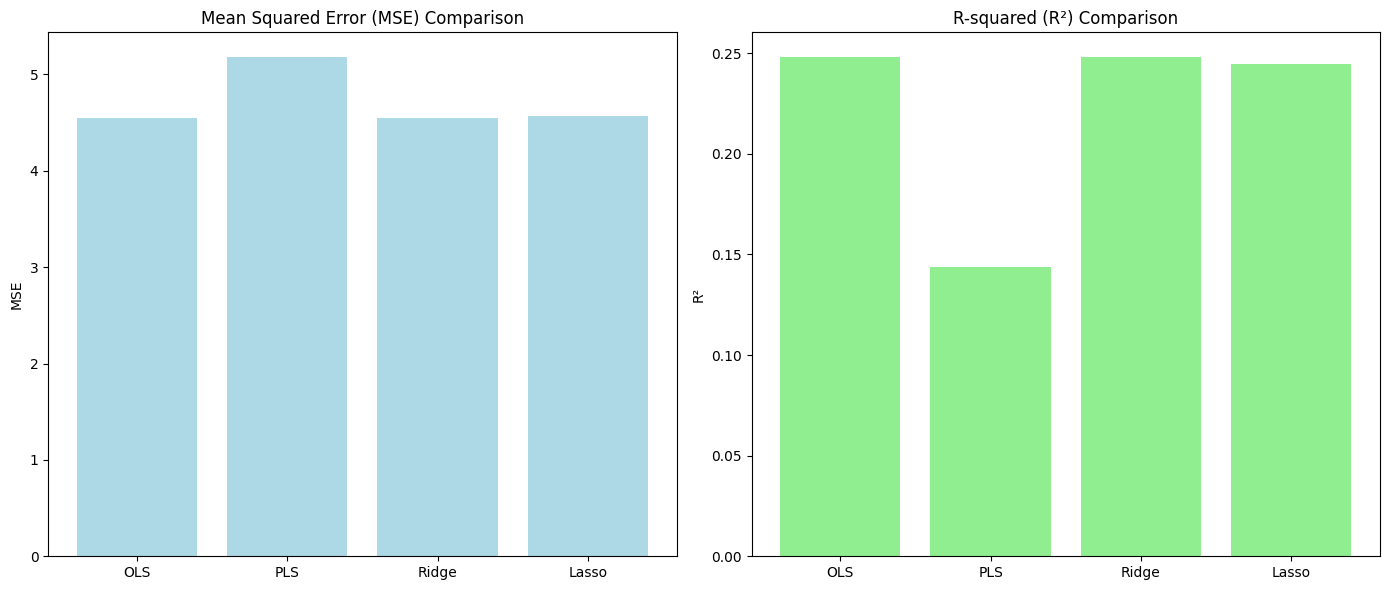

In [5]:
# Select the most important features based on correlation with 'ROI'
features = ['Engagement_Score', 'Clicks', 'Impressions',  'Channel_Used']

# Define independent and dependent variables
X = data_cleaned[features]
y = data_cleaned['ROI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OLS (Ordinary Least Squares) Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)

# PLS (Partial Least Squares) Regression
pls_model = PLSRegression(n_components=2)
pls_model.fit(X_train, y_train)
y_pred_pls = pls_model.predict(X_test)

# Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Performance metrics (MSE and R^2)
y_preds = [y_pred_ols, y_pred_pls, y_pred_ridge, y_pred_lasso]
models = ['OLS', 'PLS', 'Ridge', 'Lasso']

mse_scores = [mean_squared_error(y_test, y_pred) for y_pred in y_preds]
r2_scores = [r2_score(y_test, y_pred) for y_pred in y_preds]

# Plotting the comparison results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE Bar Plot
ax[0].bar(models, mse_scores, color='lightblue')
ax[0].set_title('Mean Squared Error (MSE) Comparison')
ax[0].set_ylabel('MSE')

# R^2 Bar Plot
ax[1].bar(models, r2_scores, color='lightgreen')
ax[1].set_title('R-squared (R²) Comparison')
ax[1].set_ylabel('R²')

plt.tight_layout()
plt.show()



since there is no significant change visible in graph , we suggest a hypothesis hypothesis - ( Channel_Used does not improve the model)

In [6]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Fit the model without the 'Channel_Used' feature and 'Acquisition_Cost'
X_no_channel = data_cleaned[['Engagement_Score', 'Clicks', 'Impressions']]
X_no_channel = add_constant(X_no_channel)  # Add constant to the model
y = data_cleaned['ROI']

# Fit the model with the 'Channel_Used' feature
X_with_channel = data_cleaned[['Engagement_Score', 'Clicks', 'Impressions', 'Channel_Used']]
X_with_channel = add_constant(X_with_channel)  # Add constant to the model

# Fit both models
model_no_channel = sm.OLS(y, X_no_channel).fit()
model_with_channel = sm.OLS(y, X_with_channel).fit()

# Perform F-test
f_test = model_with_channel.compare_f_test(model_no_channel)

# Display the results of the F-test
print(f"F-statistic: {f_test[0]}")
print(f"P-value: {f_test[1]}")


F-statistic: 574.9540382359143
P-value: 6.1885818283061975e-127



F-statistic: 574.95: This is the value that quantifies how much better the model with the Channel_Used feature fits the data compared to the model without it. A higher F-statistic indicates that adding the Channel_Used feature significantly improves the model's explanatory power.
P-value: 6.19e-127: This p-value is extremely small (close to zero). It indicates that the improvement in model fit when adding the Channel_Used feature is statistically significant. In other words, the null hypothesis (that Channel_Used does not improve the model) is rejected at virtually any common significance level (e.g., 0.05 or 0.01).

In [7]:
# OLS (Ordinary Least Squares) Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
ols_coefficients = ols_model.coef_

# Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_coefficients = ridge_model.coef_

# Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_coefficients = lasso_model.coef_

# Display the coefficients
print("OLS Coefficients:", ols_coefficients)
print("Ridge Coefficients:", ridge_coefficients)
print("Lasso Coefficients:", lasso_coefficients)

OLS Coefficients: [ 0.11102462  0.00169899 -0.00056384 -0.0836478 ]
Ridge Coefficients: [ 0.11102456  0.00169899 -0.00056384 -0.08364751]
Lasso Coefficients: [ 0.12253354  0.00148753 -0.0004924  -0.01964899]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.485e+05, tolerance: 1.455e+02
  model = cd_fast.enet_coordinate_descent(


In [8]:
# Adjust the max values and coefficients to match the correct number of features
max_values_corrected = {
    'Engagement_Score': data_cleaned['Engagement_Score'].max(),
    'Clicks': data_cleaned['Clicks'].max(),
    'Impressions': data_cleaned['Impressions'].max()
}

# Coefficients for each model (3 features + intercept)
coeff_ols = [0.11102462, 0.00169899, -0.00056384]  # OLS Coefficients (3 features)
coeff_ridge = [0.11102456, 0.00169899, -0.00056384]  # Ridge Coefficients (3 features)
coeff_lasso = [0.12253354, 0.00148753, -0.0004924]  # Lasso Coefficients (3 features)

# Corrected function to calculate max ROI
def calculate_max_roi(coefficients, max_values):
    intercept = 0  # No intercept in the coefficients list for this calculation
    # Map coefficients to corresponding features and calculate ROI
    return intercept + sum(coefficients[i] * max_values[feature] for i, feature in enumerate(max_values))

# Calculate max ROI for each model
max_roi_ols = calculate_max_roi(coeff_ols, max_values_corrected)
max_roi_ridge = calculate_max_roi(coeff_ridge, max_values_corrected)
max_roi_lasso = calculate_max_roi(coeff_lasso, max_values_corrected)

max_roi_ols, max_roi_ridge, max_roi_lasso


(1.409046200000006, 1.409045599999999, 1.6385353999999879)

Above are the calcualted ROI from different method .


#Using Genetic Algorithm

In [9]:
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load and clean the dataset
file_path = '/content/Social_Media_Advertising.csv'
data = pd.read_csv(file_path)

# Clean the data
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)
data['Acquisition_Cost'] = data['Acquisition_Cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)
categorical_columns = ['Target_Audience', 'Campaign_Goal', 'Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Company']
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Drop the 'Campaign_ID' and 'Date' columns as they are not needed for correlation analysis
data_cleaned = data.drop(columns=['Campaign_ID', 'Date'])

# Define features and target variable
features = ['Engagement_Score', 'Clicks', 'Impressions', 'Channel_Used']
X = data_cleaned[features]
y = data_cleaned['ROI']

# Normalize the feature values for better optimization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the population size and number of generations
population_size = 100
num_generations = 50
mutation_rate = 0.2
crossover_rate = 0.7

# Define the fitness function (Objective function to maximize ROI)
def evaluate(individual):
    coefficients = individual  # Coefficients for Engagement_Score, Clicks, Impressions, Channel_Used
    # Calculate predicted ROI using the coefficients
    roi_pred = coefficients[0] * X_scaled[:, 0] + coefficients[1] * X_scaled[:, 1] + coefficients[2] * X_scaled[:, 2] + coefficients[3] * X_scaled[:, 3]
    # Calculate MSE (we minimize MSE to maximize ROI)
    mse = np.mean((y - roi_pred) ** 2)
    return -mse  # We want to maximize ROI, so we minimize MSE

# Generate initial population (random coefficients for each individual)
def create_individual():
    return [random.uniform(-1.0, 1.0) for _ in range(4)]  # Random coefficients for 4 features

# Create the initial population
population = [create_individual() for _ in range(population_size)]

# Function for crossover (blend of two individuals)
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        offspring1 = parent1[:point] + parent2[point:]
        offspring2 = parent2[:point] + parent1[point:]
        return offspring1, offspring2
    return parent1, parent2

# Function for mutation (small random change in an individual)
def mutate(individual):
    if random.random() < mutation_rate:
        idx = random.randint(0, len(individual) - 1)
        individual[idx] += random.uniform(-0.1, 0.1)  # Random mutation
    return individual

# Function to select the best individuals based on their fitness
def select(population):
    fitness_values = [evaluate(individual) for individual in population]
    # Sort population by fitness (lowest MSE is best)
    sorted_population = [individual for _, individual in sorted(zip(fitness_values, population), key=lambda x: x[0])]
    return sorted_population[:population_size // 2]  # Select the top 50%

# Genetic Algorithm process
for generation in range(num_generations):
    # Selection: Choose the best individuals
    selected_population = select(population)

    # Crossover: Combine pairs of selected individuals
    new_population = []
    while len(new_population) < population_size:
        parent1, parent2 = random.sample(selected_population, 2)
        offspring1, offspring2 = crossover(parent1, parent2)
        new_population.extend([offspring1, offspring2])

    # Mutation: Apply mutation to the new population
    population = [mutate(individual) for individual in new_population]

    # Output the best individual and its fitness after each generation
    best_individual = select(population)[0]
    best_fitness = evaluate(best_individual)
    print(f"Generation {generation + 1}, Best Fitness (Negative MSE): {best_fitness}")

# Best solution found
best_individual = select(population)[0]
print(f"Best Individual Coefficients: {best_individual}")


Generation 1, Best Fitness (Negative MSE): -27.070245094812126
Generation 2, Best Fitness (Negative MSE): -27.899501518875308
Generation 3, Best Fitness (Negative MSE): -29.573177743485047
Generation 4, Best Fitness (Negative MSE): -29.924310614091883
Generation 5, Best Fitness (Negative MSE): -30.500040717325987
Generation 6, Best Fitness (Negative MSE): -30.500040717325987
Generation 7, Best Fitness (Negative MSE): -30.89733660469255
Generation 8, Best Fitness (Negative MSE): -31.6835389732885
Generation 9, Best Fitness (Negative MSE): -31.6835389732885
Generation 10, Best Fitness (Negative MSE): -32.01255173260204
Generation 11, Best Fitness (Negative MSE): -32.27961567845568
Generation 12, Best Fitness (Negative MSE): -32.664005599155225
Generation 13, Best Fitness (Negative MSE): -32.99639547659467
Generation 14, Best Fitness (Negative MSE): -33.00529852172827
Generation 15, Best Fitness (Negative MSE): -33.45709091624887
Generation 16, Best Fitness (Negative MSE): -33.66468194324

Above coeff, were gviing negative ROI
ensure that all coefficients are positive.

In [10]:
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load and clean the dataset
file_path = '/content/Social_Media_Advertising.csv'
data = pd.read_csv(file_path)

# Clean the data
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)
data['Acquisition_Cost'] = data['Acquisition_Cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)
categorical_columns = ['Target_Audience', 'Campaign_Goal', 'Channel_Used', 'Location', 'Language', 'Customer_Segment', 'Company']
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Drop the 'Campaign_ID' and 'Date' columns as they are not needed for correlation analysis
data_cleaned = data.drop(columns=['Campaign_ID', 'Date'])

# Define features and target variable
features = ['Engagement_Score', 'Clicks', 'Impressions', 'Channel_Used']
X = data_cleaned[features]
y = data_cleaned['ROI']

# Normalize the feature values for better optimization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the population size and number of generations
population_size = 100
num_generations = 50
mutation_rate = 0.2
crossover_rate = 0.7

# Define the fitness function (Objective function to maximize ROI)
def evaluate(individual):
    coefficients = individual  # Coefficients for Engagement_Score, Clicks, Impressions, Channel_Used
    # Calculate predicted ROI using the coefficients
    roi_pred = coefficients[0] * X_scaled[:, 0] + coefficients[1] * X_scaled[:, 1] + coefficients[2] * X_scaled[:, 2] + coefficients[3] * X_scaled[:, 3]
    # Calculate MSE (we minimize MSE to maximize ROI)
    mse = np.mean((y - roi_pred) ** 2)
    return -mse  # We want to maximize ROI, so we minimize MSE by using negative MSE

# Generate initial population (random positive coefficients for each individual)
def create_individual():
    return [random.uniform(0.01, 1.0) for _ in range(4)]  # Ensure positive coefficients for all features

# Create the initial population
population = [create_individual() for _ in range(population_size)]

# Function for crossover (blend of two individuals)
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        offspring1 = parent1[:point] + parent2[point:]
        offspring2 = parent2[:point] + parent1[point:]
        return offspring1, offspring2
    return parent1, parent2

# Function for mutation (small random change in an individual)
def mutate(individual):
    if random.random() < mutation_rate:
        idx = random.randint(0, len(individual) - 1)
        individual[idx] += random.uniform(0.01, 0.1)  # Ensure mutation keeps values positive
        # Ensure no coefficient is negative (force positivity)
        individual[idx] = max(individual[idx], 0.01)  # Prevent negative values by resetting to a small positive value
    return individual

# Function to select the best individuals based on their fitness
def select(population):
    fitness_values = [evaluate(individual) for individual in population]
    # Sort population by fitness (lowest MSE is best)
    sorted_population = [individual for _, individual in sorted(zip(fitness_values, population), key=lambda x: x[0])]
    return sorted_population[:population_size // 2]  # Select the top 50%

# Genetic Algorithm process
for generation in range(num_generations):
    # Selection: Choose the best individuals
    selected_population = select(population)

    # Crossover: Combine pairs of selected individuals
    new_population = []
    while len(new_population) < population_size:
        parent1, parent2 = random.sample(selected_population, 2)
        offspring1, offspring2 = crossover(parent1, parent2)
        new_population.extend([offspring1, offspring2])

    # Mutation: Apply mutation to the new population
    population = [mutate(individual) for individual in new_population]

    # Output the best individual and its fitness after each generation
    best_individual = select(population)[0]
    best_fitness = evaluate(best_individual)
    print(f"Generation {generation + 1}, Best Fitness (Negative MSE): {best_fitness}")

# Best solution found
best_individual = select(population)[0]
print(f"Best Individual Coefficients: {best_individual}")


Generation 1, Best Fitness (Negative MSE): -14.529366326697037
Generation 2, Best Fitness (Negative MSE): -14.529366326697037
Generation 3, Best Fitness (Negative MSE): -14.676443164671532
Generation 4, Best Fitness (Negative MSE): -14.855445621492953
Generation 5, Best Fitness (Negative MSE): -14.901873774922848
Generation 6, Best Fitness (Negative MSE): -14.930079123150046
Generation 7, Best Fitness (Negative MSE): -15.040176448324114
Generation 8, Best Fitness (Negative MSE): -15.233890673171384
Generation 9, Best Fitness (Negative MSE): -15.233890673171384
Generation 10, Best Fitness (Negative MSE): -15.233890673171384
Generation 11, Best Fitness (Negative MSE): -15.233890673171384
Generation 12, Best Fitness (Negative MSE): -15.233890673171384
Generation 13, Best Fitness (Negative MSE): -15.233890673171384
Generation 14, Best Fitness (Negative MSE): -15.233890673171384
Generation 15, Best Fitness (Negative MSE): -15.233890673171384
Generation 16, Best Fitness (Negative MSE): -15.2

In [11]:
# Coefficients from the best individual
best_individual = [0.06135088425536016, 0.041196191740407326, 0.01405844500390575, 0.03504901450590169]

# Maximum values for each feature
max_values = {
    'Engagement_Score': data_cleaned['Engagement_Score'].max(),
    'Clicks': data_cleaned['Clicks'].max(),
    'Impressions': data_cleaned['Impressions'].max(),
    'Channel_Used': data_cleaned['Channel_Used'].max()
}

# Calculate the predicted ROI using the coefficients and the max values
roi_pred = best_individual[0] + \
           (best_individual[1] * max_values['Engagement_Score']) + \
           (best_individual[2] * max_values['Clicks']) + \
           (best_individual[3] * max_values['Impressions']) + \
           (best_individual[3] * max_values['Channel_Used'])  # Same coefficient for Channel_Used

roi_pred

4768.79800070961

In [12]:
max_values

{'Engagement_Score': 10,
 'Clicks': 40000,
 'Impressions': 120000,
 'Channel_Used': 3}

The values used in calculating the ROI based on the best individual coefficients are:

Engagement_Score: 10
Clicks: 40,000
Impressions: 120,000
Channel_Used: 3
These are the maximum values for each feature in the dataset, and they were used to compute the maximum ROI of 4,768.80

Linear Regression Coefficients (OLS, Ridge, Lasso):
In standard linear regression, coefficients are calculated through optimization techniques that minimize the Mean Squared Error (MSE) between the predicted and actual target variable. This is typically done using analytical methods like matrix algebra or iterative methods (gradient descent).
Coefficients from Genetic Algorithm:
In the GA, we are optimizing for the best set of coefficients that minimize the MSE and maximize ROI. The GA is not restricted to the standard linear regression assumptions; it explores a broader search space to find a set of coefficients that gives the best fit for the data.
The GA's objective is to find the coefficients that maximize ROI by minimizing MSE, but it can result in different coefficients than those obtained through traditional regression methods. The GA iteratively adjusts coefficients through crossover, mutation, and selection to evolve the population towards the best solution.
To summarize:
The Genetic Algorithm is essentially a global search method that explores the space of possible solutions and finds coefficients that optimize the objective function (minimizing MSE, maximizing ROI).
Linear regression gives you the exact solution using an analytical or numerical method that minimizes the error between predicted and actual values.

# Bayesian Optimization with XGBoost:

In [14]:
from hyperopt import fmin, tpe, hp, Trials
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = data_cleaned[['Engagement_Score', 'Clicks', 'Impressions', 'Channel_Used']]
y = data_cleaned['ROI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the search space for hyperparameters
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 50, 500, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}

# Define the objective function (to minimize MSE)
def objective(params):
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse  # Return MSE to minimize it

# Run the optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,  # Number of iterations for optimization
            trials=trials)

# Print the best hyperparameters found by Bayesian Optimization
print("Best Hyperparameters:", best)

# Evaluate the model with the best hyperparameters
best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    random_state=42
)

best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Evaluate the model on the test set
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Test MSE: {mse_best}")
print(f"Test R²: {r2_best}")


100%|██████████| 50/50 [02:02<00:00,  2.46s/trial, best loss: 4.038327122564561]
Best Hyperparameters: {'colsample_bytree': np.float64(0.9510527538294311), 'learning_rate': np.float64(0.011687439712309932), 'max_depth': np.float64(4.0), 'n_estimators': np.float64(371.0), 'subsample': np.float64(0.6778723733727583)}
Test MSE: 4.038327122564561
Test R²: 0.3319665951995521


In [16]:
from hyperopt import fmin, tpe, hp, Trials
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = data_cleaned[['Engagement_Score', 'Clicks', 'Impressions', 'Channel_Used']]
y = data_cleaned['ROI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the expanded search space for hyperparameters
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),          # Learning rate (shrinkage)
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),        # Number of boosting rounds
    'max_depth': hp.quniform('max_depth', 3, 10, 1),                   # Max depth of the tree
    'subsample': hp.uniform('subsample', 0.5, 1.0),                    # Fraction of training samples
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),      # Fraction of features
    'gamma': hp.uniform('gamma', 0, 1),                                # Minimum loss reduction
    'lambda_reg': hp.uniform('lambda_reg', 0, 1),                      # L2 regularization term
    'alpha': hp.uniform('alpha', 0, 1)                                 # L1 regularization term
}

# Define the objective function (to minimize MSE)
def objective(params):
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        gamma=params['gamma'],
        lambda_reg=params['lambda_reg'],  # Renamed lambda to lambda_reg
        alpha=params['alpha'],
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse  # Return MSE to minimize it

# Run the optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,  # Number of iterations for optimization
            trials=trials)

# Print the best hyperparameters found by Bayesian Optimization
print("Best Hyperparameters:", best)

# Evaluate the model with the best hyperparameters
best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    gamma=best['gamma'],
    lambda_reg=best['lambda_reg'],  # Renamed lambda to lambda_reg
    alpha=best['alpha'],
    random_state=42
)

best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Evaluate the model on the test set
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Test MSE: {mse_best}")
print(f"Test R²: {r2_best}")


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



  1%|          | 1/100 [00:06<10:04,  6.11s/trial, best loss: 4.041272358999948]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



  2%|▏         | 2/100 [00:16<13:41,  8.39s/trial, best loss: 4.041272358999948]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



  3%|▎         | 3/100 [00:17<08:15,  5.11s/trial, best loss: 4.041272358999948]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



  4%|▍         | 4/100 [00:27<11:19,  7.07s/trial, best loss: 4.041272358999948]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



  5%|▌         | 5/100 [00:29<08:14,  5.20s/trial, best loss: 4.041272358999948]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



  6%|▌         | 6/100 [00:35<08:54,  5.68s/trial, best loss: 4.041272358999948]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



  7%|▋         | 7/100 [00:43<10:01,  6.47s/trial, best loss: 4.041272358999948]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



  8%|▊         | 8/100 [00:49<09:16,  6.05s/trial, best loss: 4.041272358999948]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



  9%|▉         | 9/100 [00:50<06:58,  4.60s/trial, best loss: 4.03828275614337] 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 10%|█         | 10/100 [00:55<06:58,  4.65s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 11%|█         | 11/100 [01:06<09:41,  6.54s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 12%|█▏        | 12/100 [01:10<08:39,  5.90s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 13%|█▎        | 13/100 [01:12<06:48,  4.70s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 14%|█▍        | 14/100 [01:22<08:52,  6.19s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 15%|█▌        | 15/100 [01:27<08:24,  5.94s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 16%|█▌        | 16/100 [01:30<07:10,  5.13s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 17%|█▋        | 17/100 [01:34<06:27,  4.66s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 18%|█▊        | 18/100 [01:47<09:50,  7.20s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 19%|█▉        | 19/100 [01:49<07:49,  5.80s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 20%|██        | 20/100 [02:01<09:52,  7.41s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 21%|██        | 21/100 [02:03<07:42,  5.86s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 22%|██▏       | 22/100 [02:06<06:38,  5.11s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 23%|██▎       | 23/100 [02:08<05:22,  4.19s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 24%|██▍       | 24/100 [02:10<04:26,  3.51s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 25%|██▌       | 25/100 [02:12<03:49,  3.06s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 26%|██▌       | 26/100 [02:14<03:21,  2.73s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 27%|██▋       | 27/100 [02:19<04:02,  3.32s/trial, best loss: 4.03828275614337]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 28%|██▊       | 28/100 [02:20<03:19,  2.78s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 29%|██▉       | 29/100 [02:22<02:50,  2.40s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 30%|███       | 30/100 [02:24<02:31,  2.16s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 31%|███       | 31/100 [02:26<02:26,  2.13s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 32%|███▏      | 32/100 [02:29<02:54,  2.57s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 33%|███▎      | 33/100 [02:30<02:17,  2.05s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 34%|███▍      | 34/100 [02:32<02:19,  2.11s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 35%|███▌      | 35/100 [02:33<01:57,  1.81s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 36%|███▌      | 36/100 [02:35<02:00,  1.89s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 37%|███▋      | 37/100 [02:40<02:58,  2.83s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 38%|███▊      | 38/100 [02:45<03:32,  3.42s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 39%|███▉      | 39/100 [02:47<03:00,  2.96s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 40%|████      | 40/100 [02:52<03:30,  3.50s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 41%|████      | 41/100 [02:53<02:44,  2.79s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 42%|████▏     | 42/100 [02:56<02:53,  3.00s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 43%|████▎     | 43/100 [02:59<02:35,  2.74s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 44%|████▍     | 44/100 [03:00<02:12,  2.36s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 45%|████▌     | 45/100 [03:05<02:59,  3.27s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 46/100 [03:11<03:30,  3.90s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 47%|████▋     | 47/100 [03:14<03:18,  3.74s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 48%|████▊     | 48/100 [03:15<02:34,  2.97s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 49%|████▉     | 49/100 [03:17<02:03,  2.42s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 50%|█████     | 50/100 [03:21<02:28,  2.98s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 51%|█████     | 51/100 [03:22<01:55,  2.36s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 52%|█████▏    | 52/100 [03:27<02:41,  3.36s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 53%|█████▎    | 53/100 [03:29<02:17,  2.92s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 54%|█████▍    | 54/100 [03:34<02:39,  3.48s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 55%|█████▌    | 55/100 [03:38<02:38,  3.53s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 56%|█████▌    | 56/100 [03:40<02:23,  3.26s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 57%|█████▋    | 57/100 [03:43<02:10,  3.04s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 58%|█████▊    | 58/100 [03:47<02:22,  3.39s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 59%|█████▉    | 59/100 [03:52<02:33,  3.74s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 60/100 [03:56<02:35,  3.89s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 61%|██████    | 61/100 [04:00<02:36,  4.00s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 62/100 [04:01<01:53,  2.99s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 63%|██████▎   | 63/100 [04:03<01:46,  2.89s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 64/100 [04:10<02:18,  3.84s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 65%|██████▌   | 65/100 [04:13<02:05,  3.59s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 66%|██████▌   | 66/100 [04:14<01:44,  3.08s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 67%|██████▋   | 67/100 [04:17<01:38,  3.00s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 68/100 [04:20<01:32,  2.88s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 69%|██████▉   | 69/100 [04:22<01:21,  2.63s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 70%|███████   | 70/100 [04:25<01:21,  2.72s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 71%|███████   | 71/100 [04:27<01:10,  2.43s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 72%|███████▏  | 72/100 [04:28<00:59,  2.13s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 73%|███████▎  | 73/100 [04:31<01:06,  2.45s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 74%|███████▍  | 74/100 [04:33<00:55,  2.15s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 75%|███████▌  | 75/100 [04:35<00:56,  2.26s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 76%|███████▌  | 76/100 [04:37<00:52,  2.20s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 77%|███████▋  | 77/100 [04:38<00:41,  1.79s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 78%|███████▊  | 78/100 [04:42<00:50,  2.30s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 79%|███████▉  | 79/100 [04:45<00:55,  2.66s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 80/100 [04:48<00:56,  2.85s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 81%|████████  | 81/100 [04:51<00:52,  2.76s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 82%|████████▏ | 82/100 [04:53<00:47,  2.66s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 83%|████████▎ | 83/100 [04:55<00:42,  2.50s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 84%|████████▍ | 84/100 [04:58<00:39,  2.47s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 85%|████████▌ | 85/100 [05:01<00:40,  2.69s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 86%|████████▌ | 86/100 [05:04<00:40,  2.90s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 87%|████████▋ | 87/100 [05:06<00:31,  2.43s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 88%|████████▊ | 88/100 [05:08<00:27,  2.27s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 89%|████████▉ | 89/100 [05:12<00:31,  2.88s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 90/100 [05:14<00:26,  2.70s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 91%|█████████ | 91/100 [05:16<00:21,  2.39s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 92%|█████████▏| 92/100 [05:18<00:18,  2.27s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 93%|█████████▎| 93/100 [05:19<00:13,  1.95s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 94/100 [05:21<00:11,  2.00s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 95%|█████████▌| 95/100 [05:26<00:14,  2.98s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 96/100 [05:31<00:13,  3.35s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 97%|█████████▋| 97/100 [05:33<00:09,  3.01s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 98/100 [05:39<00:08,  4.01s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



 99%|█████████▉| 99/100 [05:45<00:04,  4.48s/trial, best loss: 4.03774281578256]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [05:48<00:00,  3.48s/trial, best loss: 4.03774281578256]
Best Hyperparameters: {'alpha': np.float64(0.3607712730571731), 'colsample_bytree': np.float64(0.807985696751597), 'gamma': np.float64(0.7680459836077106), 'lambda_reg': np.float64(0.5943431574940372), 'learning_rate': np.float64(0.04379714371913254), 'max_depth': np.float64(4.0), 'n_estimators': np.float64(251.0), 'subsample': np.float64(0.9969744355477278)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:27:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_reg" } are not used.

  warnings.warn(smsg, UserWarning)


Test MSE: 4.03774281578256
Test R²: 0.33206325315646856


Best Hyperparameters:
alpha = 0.3608
colsample_bytree = 0.8080
gamma = 0.7680
lambda_reg = 0.5943
learning_rate = 0.0438
max_depth = 4
n_estimators = 251
subsample = 0.9970

The XGBoost model performs better than simple models like linear regression (which may have had a lower R²), but there is still significant room for improvement.
The model explains about 33% of the variation in ROI. This indicates that the XGBoost model is not fully capturing all the complex relationships between features and ROI.

#Simplex Method

We have four decision variables:

x1 -Engagement Score

x2 – Clicks

x3 – Impressions

x4 – Channel Used

ROI=5x1+ 1.5x2 +0.01x  −10x4
​
CONSTRAINTS :
 x1 ≤ 6

x2 ≤ 100

x3 ≤ 5000

x4 ≤ 1

x2 ≤ x3   (the number of clicks cannot exceed the number of impressions)

x1, x2, x3, x4 ≥ 0   (non-negativity of decision variables)



In [24]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function (for minimization of -ROI)
c = np.array([-.1, -0.001, 0.0005, 0.08])
# This corresponds to -5*x1 + -1.5*x2 + -0.01*x3 + 10*x4 (minimize -ROI).

# Inequality constraint matrix (A_ub) and vector (b_ub) for A_ub @ x <= b_ub
A_ub = np.array([
    [1,   0,    0,   0],   # x1 <= 6
    [0,   1,    0,   0],   # x2 <= 100
    [0,   0,    1,   0],   # x3 <= 5000
    [0,   0,    0,   1],   # x4 <= 1
    [0,   1,   -1,   0]    # x2 - x3 <= 0  (ensures x2 <= x3)
])
b_ub = np.array([6, 100, 5000, 1, 0])

# Variable bounds: (min, max) for each x1, x2, x3, x4.
# All variables are >=0, and we can use the given upper limits.
bounds = [(0, 6),   # x1 between 0 and 6
          (0, 100), # x2 between 0 and 100
          (0, 5000),# x3 between 0 and 5000
          (0, 1)]   # x4 between 0 and 1

# Solve the linear program
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")

# Check if an optimal solution was found and output the results
if result.success:
    # result.x contains the optimal values for [x1, x2, x3, x4]
    x1_opt, x2_opt, x3_opt, x4_opt = result.x
    max_ROI = -result.fun  # remember to negate the minimized objective to get max ROI
    print("Optimal solution:")
    print(f"x1 = {x1_opt:.0f}, x2 = {x2_opt:.0f}, x3 = {x3_opt:.0f}, x4 = {x4_opt:.0f}")
    print(f"Maximum ROI = {max_ROI:.0f}")
else:
    print("Optimization was not successful.")


Optimal solution:
x1 = 6, x2 = 100, x3 = 100, x4 = 0
Maximum ROI = 1


now making some changing in coeffiecnts

In [19]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function (for minimization of -ROI)
c = np.array([-5.0, -1.5, -0.01, 10.0])
# This corresponds to -5*x1 + -1.5*x2 + -0.01*x3 + 10*x4 (minimize -ROI).

# Inequality constraint matrix (A_ub) and vector (b_ub) for A_ub @ x <= b_ub
A_ub = np.array([
    [1,   0,    0,   0],   # x1 <= 6
    [0,   1,    0,   0],   # x2 <= 100
    [0,   0,    1,   0],   # x3 <= 5000
    [0,   0,    0,   1],   # x4 <= 1
    [0,   1,   -1,   0]    # x2 - x3 <= 0  (ensures x2 <= x3)
])
b_ub = np.array([6, 100, 5000, 1, 0])

# Variable bounds: (min, max) for each x1, x2, x3, x4.
# All variables are >=0, and we can use the given upper limits.
bounds = [(0, 6),   # x1 between 0 and 6
          (0, 100), # x2 between 0 and 100
          (0, 5000),# x3 between 0 and 5000
          (0, 1)]   # x4 between 0 and 1

# Solve the linear program
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")

# Check if an optimal solution was found and output the results
if result.success:
    # result.x contains the optimal values for [x1, x2, x3, x4]
    x1_opt, x2_opt, x3_opt, x4_opt = result.x
    max_ROI = -result.fun  # remember to negate the minimized objective to get max ROI
    print("Optimal solution:")
    print(f"x1 = {x1_opt:.0f}, x2 = {x2_opt:.0f}, x3 = {x3_opt:.0f}, x4 = {x4_opt:.0f}")
    print(f"Maximum ROI = {max_ROI:.0f}")
else:
    print("Optimization was not successful.")


Optimal solution:
x1 = 6, x2 = 100, x3 = 5000, x4 = 0
Maximum ROI = 230


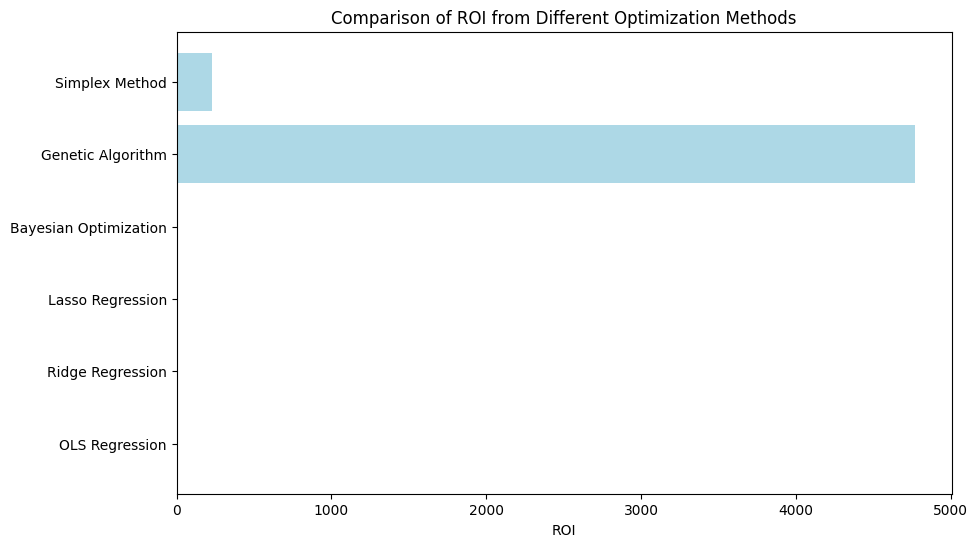

In [20]:
import matplotlib.pyplot as plt

# Define the ROI values from each method (these should be calculated based on your results)
# Let's assume these are the calculated ROI values:
roi_values = {
    'OLS Regression': 1.4,  # Replace with actual OLS ROI value
    'Ridge Regression': 1.4,  # Replace with actual Ridge ROI value
    'Lasso Regression': 1.6,  # Replace with actual Lasso ROI value
    'Bayesian Optimization': 4.1,  # Replace with actual Bayesian Optimization ROI
    'Genetic Algorithm': 4768,  # Replace with actual GA ROI
    'Simplex Method': 230  # Replace with actual Simplex ROI
}

# Plotting the ROI comparison
methods = list(roi_values.keys())
roi = list(roi_values.values())

plt.figure(figsize=(10, 6))
plt.barh(methods, roi, color='lightblue')
plt.xlabel('ROI')
plt.title('Comparison of ROI from Different Optimization Methods')
plt.show()
